In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
csv_Gyroscope = "data/04/gyroscope.csv"

raw_Gyroscope = pd.read_csv(csv_Gyroscope)

sample_freq = 100
window_acc = 400
window_pre = 240
window_gayo = 120
shift_amount = window_pre * -1

# 生データの描画
# df_pre = pd.read_csv(csv_Pressure)
df_gyro = pd.read_csv(csv_Gyroscope)


df_gyro["norm"] = (df_gyro["x"] ** 2 + df_gyro["y"] ** 2 + df_gyro["z"] ** 2) ** (1 / 2)

df_gyro["angle"] = np.cumsum(df_gyro["x"]) / sample_freq

df_gyro["low_x"] = df_gyro["x"].rolling(window=window_gayo).mean()
df_gyro["angle_x"] = df_gyro["angle"].rolling(window=window_gayo, center=True).mean()

In [3]:
unit_time = 0.7
df_gyro["time_unit"] = (df_gyro["t"] / unit_time).astype(int)

# グループ化して角度を積分
angle_df = (
    df_gyro.groupby("time_unit")
    .apply(
        lambda df: pd.Series(
            {
                "t": df["t"].iloc[0],  # 各グループの開始時間
                "angle_x": np.trapz(df[f"angle_x"], df["t"])
                * (180 / np.pi),  # ラジアンから度に変換
            }
        )
    )
    .reset_index(drop=True)
)

/var/folders/1w/52jfb36j6sg557p8z_gknglh0000gn/T/ipykernel_54130/1398932464.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  "angle_x": np.trapz(df[f"angle_x"], df["t"])
/var/folders/1w/52jfb36j6sg557p8z_gknglh0000gn/T/ipykernel_54130/1398932464.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


<Figure size 640x480 with 0 Axes>

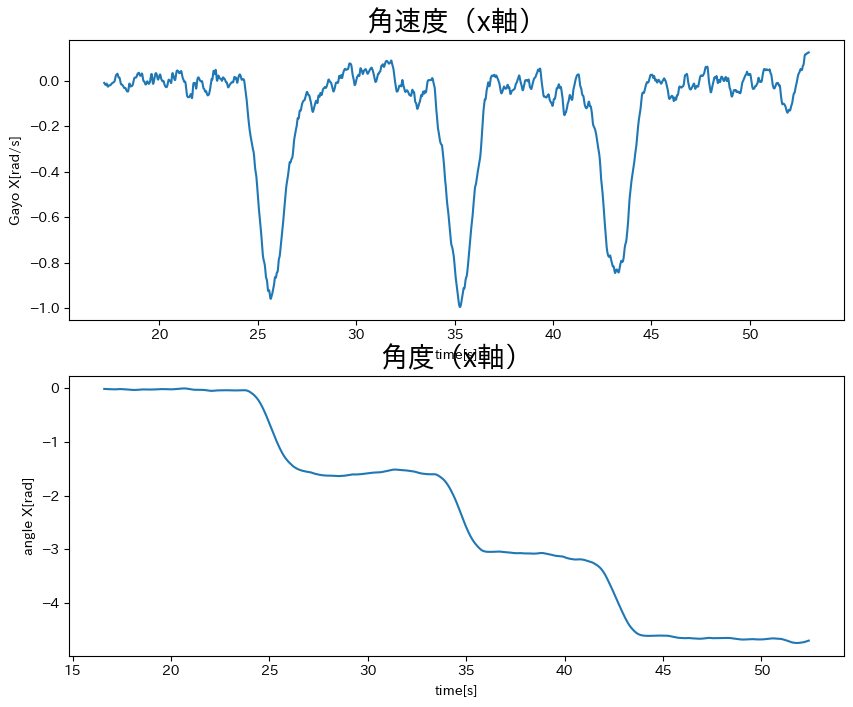

In [4]:
plt.subplots_adjust(hspace=0.3)
fig = plt.figure(figsize=(10, 8))


# 角速度（x軸）のプロット
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(df_gyro["t"], df_gyro["low_x"])
ax1.set_title("角速度（x軸）", fontsize=20)
ax1.set_xlabel("time[s]")
ax1.set_ylabel("Gayo X[rad/s]")

# 角度（x軸）のプロット
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(df_gyro["t"], df_gyro["angle_x"])
ax2.set_title("角度（x軸）", fontsize=20)
ax2.set_xlabel("time[s]")
ax2.set_ylabel("angle X[rad]")

plt.show()